In [ ]:
#Refernce to these code is: https://github.com/deep-learning-with-pytorch/dlwpt-code

In [6]:
import torch.nn as nn
import torch
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
from collections import OrderedDict

# Chapter 5: The mechanics of learning # 

 - Understanding how algorithms can learn from data
 - Reframing learning as parameter estimation, using differentiation and gradient descent
 - Walking through a simple learning algorithm
 - How PyTorch supports learning with autograd

###  Learning is just a parameter estimation ###

In order to optimize the parameter of the model—its weights—the change in
the error following a unit change in weights (that is, the gradient of the error with
respect to the parameters) is computed using the chain rule for the derivative of a
composite function (backward pass).

## Fit the model to the input training instances ## 

### Prepare input data ###

We start by making a note of temperature data in good old Celsius and measurements from our new thermometer, 
and figure things out.

In [7]:
# t_c are values in celsius
# t_u are values in unknown unit

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

### Prediction using simple model ###

In [8]:
def model(t_u,w,b):
    return w*t_u+b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

w=torch.ones(())
b=torch.zeros(())

t_p=model(t_u,w,b)

print("predictions are :",t_p)

loss=loss_fn(t_p,t_c)
print("loss is :", loss)



predictions are : tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])
loss is : tensor(1763.8848)


### Prepare model with Gradient descend loss and epochs ## 

In [40]:
delta=0.1

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) -loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
learning_rate=1e-2
w = w - learning_rate * loss_rate_of_change_w
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def model(t_u, w, b):
    return w * t_u + b

def dmodel_dw(t_u,w,b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

def training_loop(n_epochs, learning_rate, params,t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params


### Fit the model on Normalized inputs ###

In [43]:
#The learning rate is one of the things we typically change when training does not go as well as we would like.

t_un = 0.1 * t_u

training_loop (
              n_epochs=50,
              learning_rate=1e-4,
              params=torch.tensor([1.0,0.0]),
              t_u=t_un,t_c=t_c
              )

Epoch 1, Loss 80.364342
Epoch 2, Loss 79.752480
Epoch 3, Loss 79.148026
Epoch 4, Loss 78.550865
Epoch 5, Loss 77.960899
Epoch 6, Loss 77.378052
Epoch 7, Loss 76.802254
Epoch 8, Loss 76.233406
Epoch 9, Loss 75.671425
Epoch 10, Loss 75.116219
Epoch 11, Loss 74.567734
Epoch 12, Loss 74.025856
Epoch 13, Loss 73.490532
Epoch 14, Loss 72.961662
Epoch 15, Loss 72.439178
Epoch 16, Loss 71.923004
Epoch 17, Loss 71.413055
Epoch 18, Loss 70.909271
Epoch 19, Loss 70.411568
Epoch 20, Loss 69.919861
Epoch 21, Loss 69.434097
Epoch 22, Loss 68.954185
Epoch 23, Loss 68.480080
Epoch 24, Loss 68.011688
Epoch 25, Loss 67.548958
Epoch 26, Loss 67.091805
Epoch 27, Loss 66.640167
Epoch 28, Loss 66.193993
Epoch 29, Loss 65.753181
Epoch 30, Loss 65.317703
Epoch 31, Loss 64.887482
Epoch 32, Loss 64.462448
Epoch 33, Loss 64.042534
Epoch 34, Loss 63.627697
Epoch 35, Loss 63.217857
Epoch 36, Loss 62.812977
Epoch 37, Loss 62.412975
Epoch 38, Loss 62.017799
Epoch 39, Loss 61.627377
Epoch 40, Loss 61.241684
Epoch 41,

tensor([1.3360, 0.0440])

In [46]:
#Let’s run the loop for enough iterations to see the changes in params get small.

params =  training_loop (
                        n_epochs = 500,
                        learning_rate = 1e-2,
                        params = torch.tensor([1.0, 0.0]),
                        t_u = t_un,
                        t_c = t_c,
                        );


t_p=model(t_un,*params)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

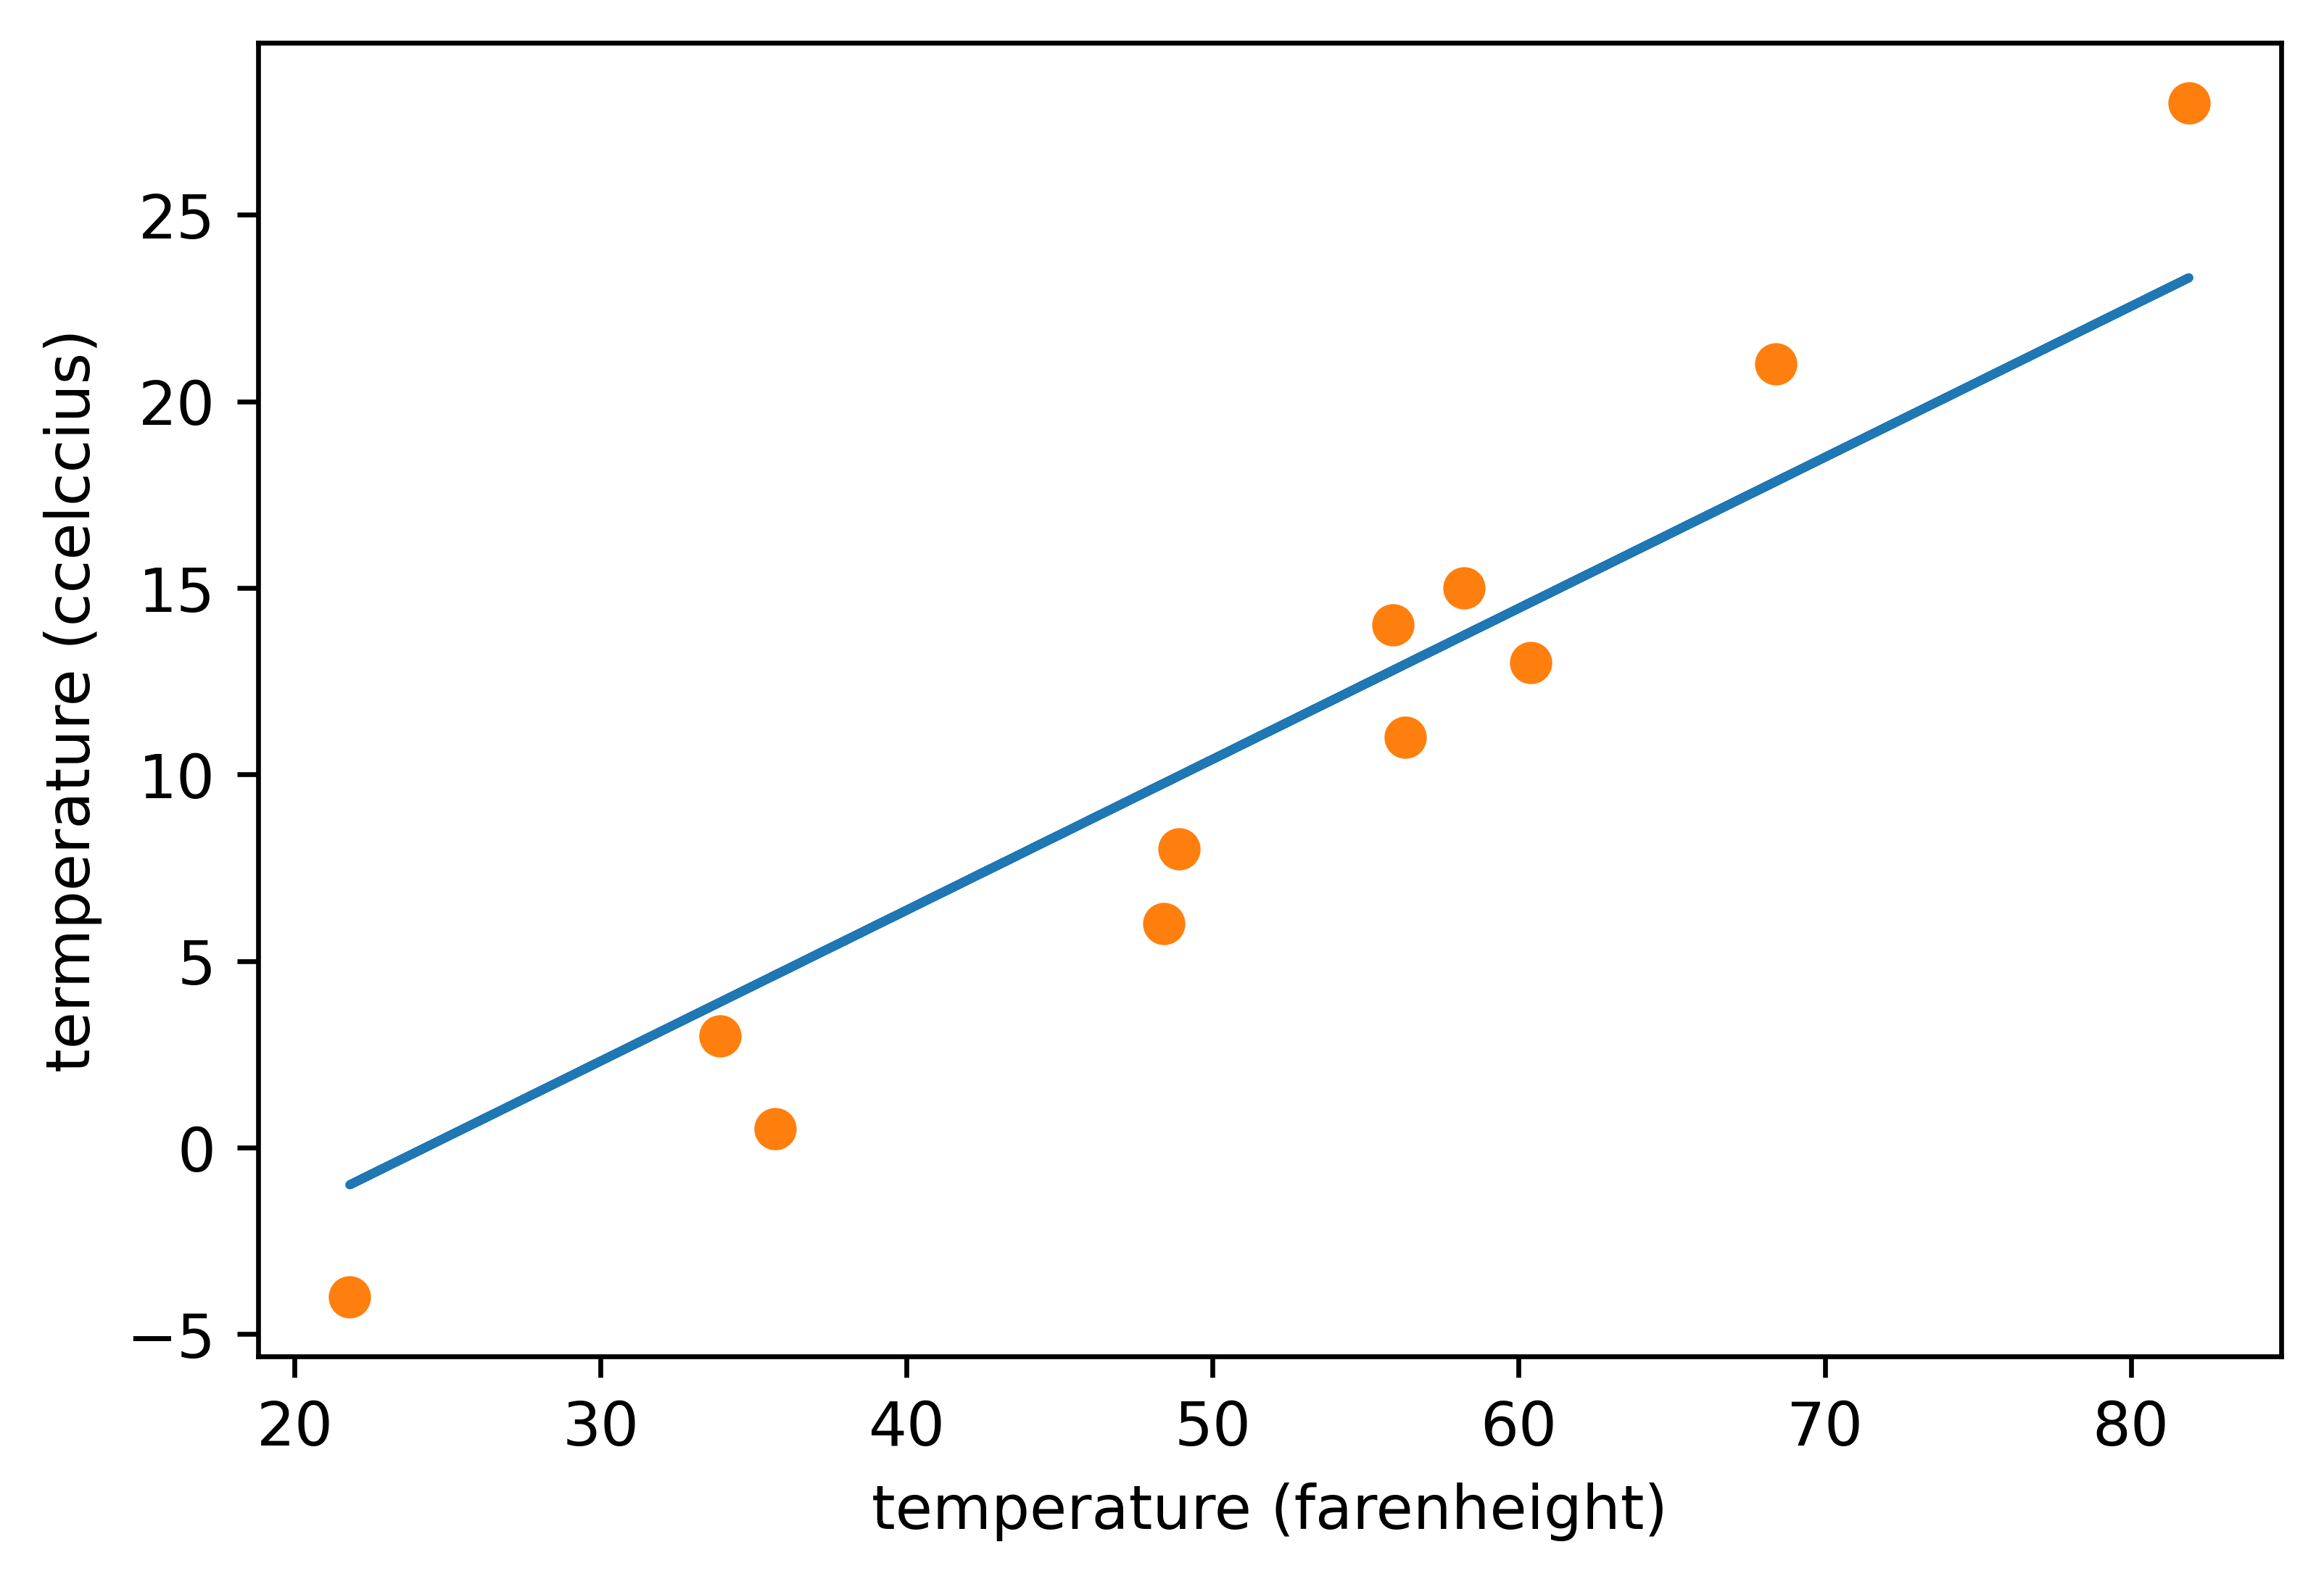

In [47]:
fit=plt.figure(dpi=600)
plt.xlabel("temperature (farenheight)")
plt.ylabel("termperature (ccelccius)")
plt.plot(t_u.numpy(),t_p.detach().numpy())
plt.plot(t_u.numpy(),t_c.numpy(),'o' )

### Pytorch Autograd ###

In [50]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        with torch.no_grad():
            params -= learning_rate * params.grad
            
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [55]:
# using requires_grad=True, the grad attribute of params contains the derivatives of the loss with respect to each element of params.

params= training_loop (
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c
    );
params

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

### Optimizers ###

In [2]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

### split data into train,val, test set ###

In [57]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u


def training_loop(n_epochs, optimizer,params, train_t_u,val_t_u,
                  train_t_c,val_t_c):
    for epoch in range(1,n_epochs+1):
        train_t_p=model(train_t_u,*params)
        train_loss=loss_fn(train_t_p,train_t_c)
        
        with torch.no_grad():
            val_t_p=model(val_t_u,*params)
            val_loss=loss_fn(val_t_p,val_t_c)
            assert val_loss.requires_grad==False
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step() 
        
        if epoch<=3 or epoch % 500==0:
            print(f"epoch {epoch},Training loss  {train_loss.item():.4f}"
            ,
                 f" validation loss {val_loss.item():.4f}")
    return params



In [58]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop (
            n_epochs = 3000,
            optimizer = optimizer,
            params = params,
            train_t_u = train_t_un,
            val_t_u = val_t_un,
            train_t_c = train_t_c,
            val_t_c = val_t_c
        )

epoch 1,Training loss  90.7754  validation loss 33.5146
epoch 2,Training loss  33.7982  validation loss 34.4394
epoch 3,Training loss  27.0283  validation loss 42.0913
epoch 500,Training loss  9.4832  validation loss 10.2596
epoch 1000,Training loss  4.6468  validation loss 2.7845
epoch 1500,Training loss  3.2565  validation loss 2.4603
epoch 2000,Training loss  2.8569  validation loss 3.3453
epoch 2500,Training loss  2.7420  validation loss 4.1242
epoch 3000,Training loss  2.7090  validation loss 4.6294


tensor([  5.5929, -18.4719], requires_grad=True)

## More to read about: ##